# Imports

In [2]:
%matplotlib inline
    
import numpy as np

from astropy.table import Column
from astropy.table import Table
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.cm as cm 

import corner
import model_flux_ratio as mfr

# Optical vs NIR comparison

## Qualifying Systems

In [3]:
# Names of systems in AOS2015 that "qualified" for helium abundance measurements
nir_qualifying = ['CGCG 007-025 (No.  2)', 'I Zw 18 SE 1', 'Mrk  209', 'Mrk  450 (No.  1)', 'Mrk  71 (No.  1)', \
             'SBS 0335-052E1', 'SBS 0335-052E3', 'SBS 0940+544 2', 'SBS 1030+583', 'SBS 1135+581', \
             'SBS 1152+579', 'Mrk  59', 'SBS 1415+437 (No.  2)', 'SBS 1415+437 (No.  1) 3', 'Tol 65']

nir_qualifying.remove('SBS 1415+437 (No.  2)') # No HeI4027 for this system (they're measured to be 0)
nir_qualifying.remove('SBS 0335-052E1') # Need to weight combine
nir_qualifying.remove('SBS 0335-052E3')
nir_qualifying.remove('SBS 1415+437 (No.  1) 3')

## Compare recovered MCMC parameters for optical vs NIR

In [4]:
# Different MCMC runs for NIR sample set
nir_diffs = ['ours_nir_S2018_11']#, 'ours_nir_S2018_33'] #['ours_nir_CCMred', 'ours_nir_S2018_11', 'ours_nir_S2018_33']

In [5]:
# MCMC characteristics
ndim = 8
onevar = -1

nwalkers = 500
nmbr = 1000
burnin = int(0.8*nmbr) #int(0.1*nmbr)

In [6]:
color = cm.jet(np.linspace(0,1,len(nir_qualifying)))

FileNotFoundError: [Errno 2] No such file or directory: 'test_data/optical+nir/ours_nir_S2018_11/CGCG007025No2_500walkers_1000steps.npy'

/Users/thsyu/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/thsyu/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


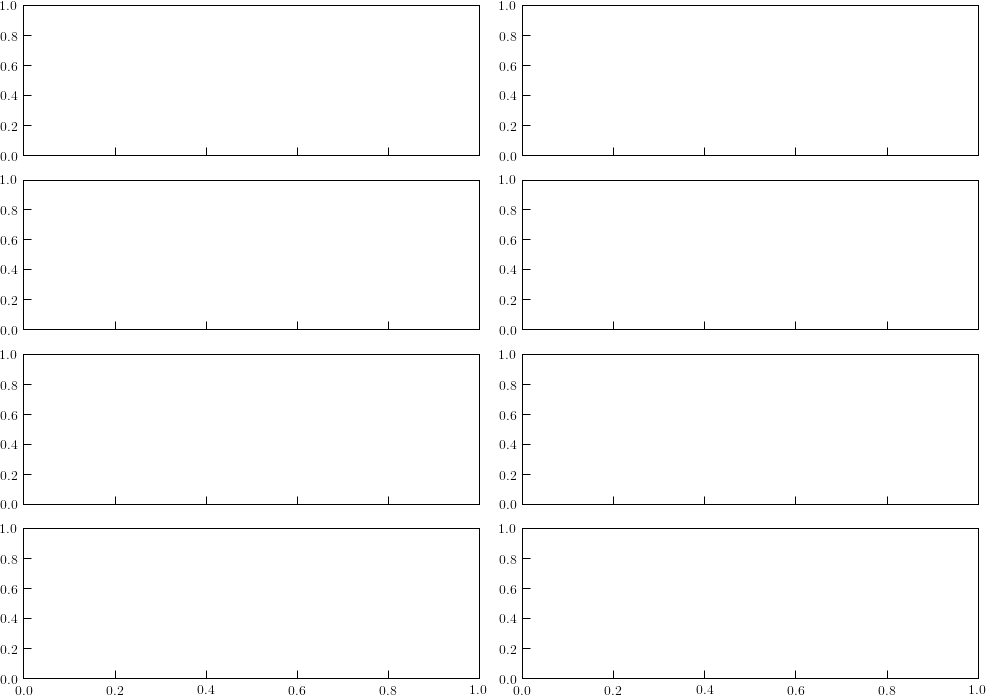

In [7]:
f, ax = plt.subplots(4,2, figsize=(14, 10), sharex=True)

for d in range(len(nir_diffs)):
    for obj in range(len(nir_qualifying)):
        name = str(nir_qualifying[obj].replace(' ', '').replace('(','').replace('-', '').replace(')','').replace('.', ''))
        
        opt_chains = np.load('test_data/optical/'+nir_diffs[d].replace('_nir','')+'/'+name+'_500walkers_1000steps.npy')
        opt_samples = opt_chains[:, burnin:, :].reshape((-1, ndim))
        y_plus_opt, temp_opt, log_dens_opt, c_Hb_opt, a_H_opt, a_He_opt, tau_He_opt, log_xi_opt = map(
            lambda v: (v[1], v[2] - v[1], v[1] - v[0]), zip(*np.percentile(opt_samples, [16, 50, 84], axis=0)))
 
        nir_chains = np.load('test_data/optical+nir/'+nir_diffs[d]+'/'+name+'_500walkers_1000steps.npy')
        nir_samples = nir_chains[:, burnin:, :].reshape((-1, ndim))
        y_plus_nir, temp_nir, log_dens_nir, c_Hb_nir, a_H_nir, a_He_nir, tau_He_nir, log_xi_nir = map(
            lambda v: (v[1], v[2] - v[1], v[1] - v[0]), zip(*np.percentile(nir_samples, [16, 50, 84], axis=0)))

        ax[0,0].errorbar(obj, y_plus_opt[0], yerr=[[y_plus_opt[1], y_plus_opt[2]]], color=color[obj], marker='o')
        ax[0,0].errorbar(obj+0.25, y_plus_nir[0], yerr=[[y_plus_nir[1], y_plus_nir[2]]], color=color[obj], marker='^', markersize=8)
        ax[0,0].set_ylabel('y+')
        ax[0,1].errorbar(obj, temp_opt[0], yerr=[[temp_opt[1], temp_opt[2]]], color=color[obj], marker='o')
        ax[0,1].errorbar(obj+0.25, temp_nir[0], yerr=[[temp_nir[1], temp_nir[2]]], color=color[obj], marker='^', markersize=8)
        ax[0,1].set_ylabel('Temperature')
        ax[1,0].errorbar(obj, log_dens_opt[0], yerr=[[log_dens_opt[1], log_dens_opt[2]]], color=color[obj], marker='o')
        ax[1,0].errorbar(obj+0.25, log_dens_nir[0], yerr=[[log_dens_nir[1], log_dens_nir[2]]], color=color[obj], marker='^', markersize=8)
        ax[1,0].set_ylabel(r'log(n$_{e}$)')
        ax[1,1].errorbar(obj, c_Hb_opt[0], yerr=[[c_Hb_opt[1], c_Hb_opt[2]]], color=color[obj], marker='o')
        ax[1,1].errorbar(obj+0.25, c_Hb_nir[0], yerr=[[c_Hb_nir[1], c_Hb_nir[2]]], color=color[obj], marker='^', markersize=8)
        ax[1,1].set_ylabel(r'c(H$\beta$)')
        ax[2,0].errorbar(obj, a_H_opt[0], yerr=[[a_H_opt[1], a_H_opt[2]]], color=color[obj], marker='o')
        ax[2,0].errorbar(obj+0.25, a_H_nir[0], yerr=[[a_H_nir[1], a_H_nir[2]]], color=color[obj], marker='^', markersize=8)
        ax[2,0].set_ylabel(r'a$_{H}$')
        ax[2,1].errorbar(obj, a_He_opt[0], yerr=[[a_He_opt[1], a_He_opt[2]]], color=color[obj], marker='o')
        ax[2,1].errorbar(obj+0.25, a_He_nir[0], yerr=[[a_He_nir[1], a_He_nir[2]]], color=color[obj], marker='^', markersize=8)
        ax[2,1].set_ylabel(r'a$_{He}$')
        ax[3,0].errorbar(obj, tau_He_opt[0], yerr=[[tau_He_opt[1], tau_He_opt[2]]], color=color[obj], marker='o')
        ax[3,0].errorbar(obj+0.25, tau_He_nir[0], yerr=[[tau_He_nir[1], tau_He_nir[2]]], color=color[obj], marker='^', markersize=8)
        ax[3,0].set_ylabel(r'$\tau_{He}$')
        ax[3,0].set_xlim(-0.5, len(nir_qualifying)+0.5)
        ax[3,0].set_xticks(np.arange(0, len(nir_qualifying)))
        ax[3,0].set_xticklabels(nir_qualifying, rotation=60, ha='right')
        ax[3,1].errorbar(obj, log_xi_opt[0], yerr=[[log_xi_opt[1], log_xi_opt[2]]], color=color[obj], marker='o')
        ax[3,1].errorbar(obj+0.25, log_xi_nir[0], yerr=[[log_xi_nir[1], log_xi_nir[2]]], color=color[obj], marker='^', markersize=8)
        ax[3,1].set_xlim(-0.5, len(nir_qualifying)+0.5)
        ax[3,1].set_ylabel(r'log($\xi$)')
        ax[3,1].set_xticks(np.arange(0, len(nir_qualifying)))
        ax[3,1].set_xticklabels(nir_qualifying, rotation=60, ha='right')

f.suptitle('Optical vs NIR MCMC results: S2018, linear', y=1.02, fontsize=24)
#f.savefig('/Users/thsyu/Dropbox/BCDs/primordial_helium/optical_vs_NIR-S2018_11.pdf', overwrite=True)
f.show()



## Individual comparison

In [8]:
ndim = 8
onevar = -1

nwalkers = 500
nmbr = 1000
burnin = int(0.8*nmbr) #int(0.1*nmbr)

opt_chains = np.load('test_MCMC_EWdist_cont_500walkers_1000steps_optical.npy')
#opt_chains = np.load('/Users/thsyu/Software/Yp/test_data/optical/ours_S2018_11/SBS0940+5442_500walkers_1000steps.npy')
opt_samples = opt_chains[:, burnin:, :].reshape((-1, ndim))

nir_chains = np.load('test_new_MCMC_EWdist_cont_500walkers_1000steps.npy')
#nir_chains = np.load('/Users/thsyu/Software/Yp/test_data/optical+nir/ours_nir_S2018_11/SBS0940+5442_500walkers_1000steps.npy')
nir_samples = nir_chains[:, burnin:, :].reshape((-1, ndim))

### Optical

In [9]:
prenams = ['y+', 'temperature', '$log(n_{e})$', 'c(H\\beta)', '$a_{H}$', '$a_{He}$', '$\\tau_{He}', '$log(\\xi)$'] #'$n_{HI}$']

print ('Best parameter values:')
y_plus_opt, temp_opt, log_dens_opt, c_Hb_opt, a_H_opt, a_He_opt, tau_He_opt, log_xi_opt = map(
    lambda v: (v[1], v[2] - v[1], v[1] - v[0]), zip(*np.percentile(opt_samples, [16, 50, 84], axis=0)))
print ('y+', y_plus_opt)
print ('T', temp_opt)
print ('log(n_e)', log_dens_opt)
print ('c(Hb)', c_Hb_opt)
print ('a_H', a_H_opt)
print ('a_He', a_He_opt)
print ('tau_He', tau_He_opt)
print ('log(xi)', log_xi_opt)

Best parameter values:
y+ (0.07987835969841113, 0.0010726997516825737, 0.0008611710456841587)
T (17964.19864245607, 268.1486369370432, 251.79412470137686)
log(n_e) (2.0151586977724305, 0.08361617970375601, 0.08889156695841671)
c(Hb) (0.1001850193896959, 0.0025380228879303274, 0.00245109637875332)
a_H (0.9479741628693625, 0.07521381271315764, 0.08909860674236314)
a_He (0.9878387609839899, 0.08294501938862509, 0.0728170700139823)
tau_He (1.0144552200717947, 0.06608566585674724, 0.06145803707381048)
log(xi) (-3.0284895920298336, 1.9723243527189585, 2.0447433887792474)


/Users/thsyu/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/thsyu/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/thsyu/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


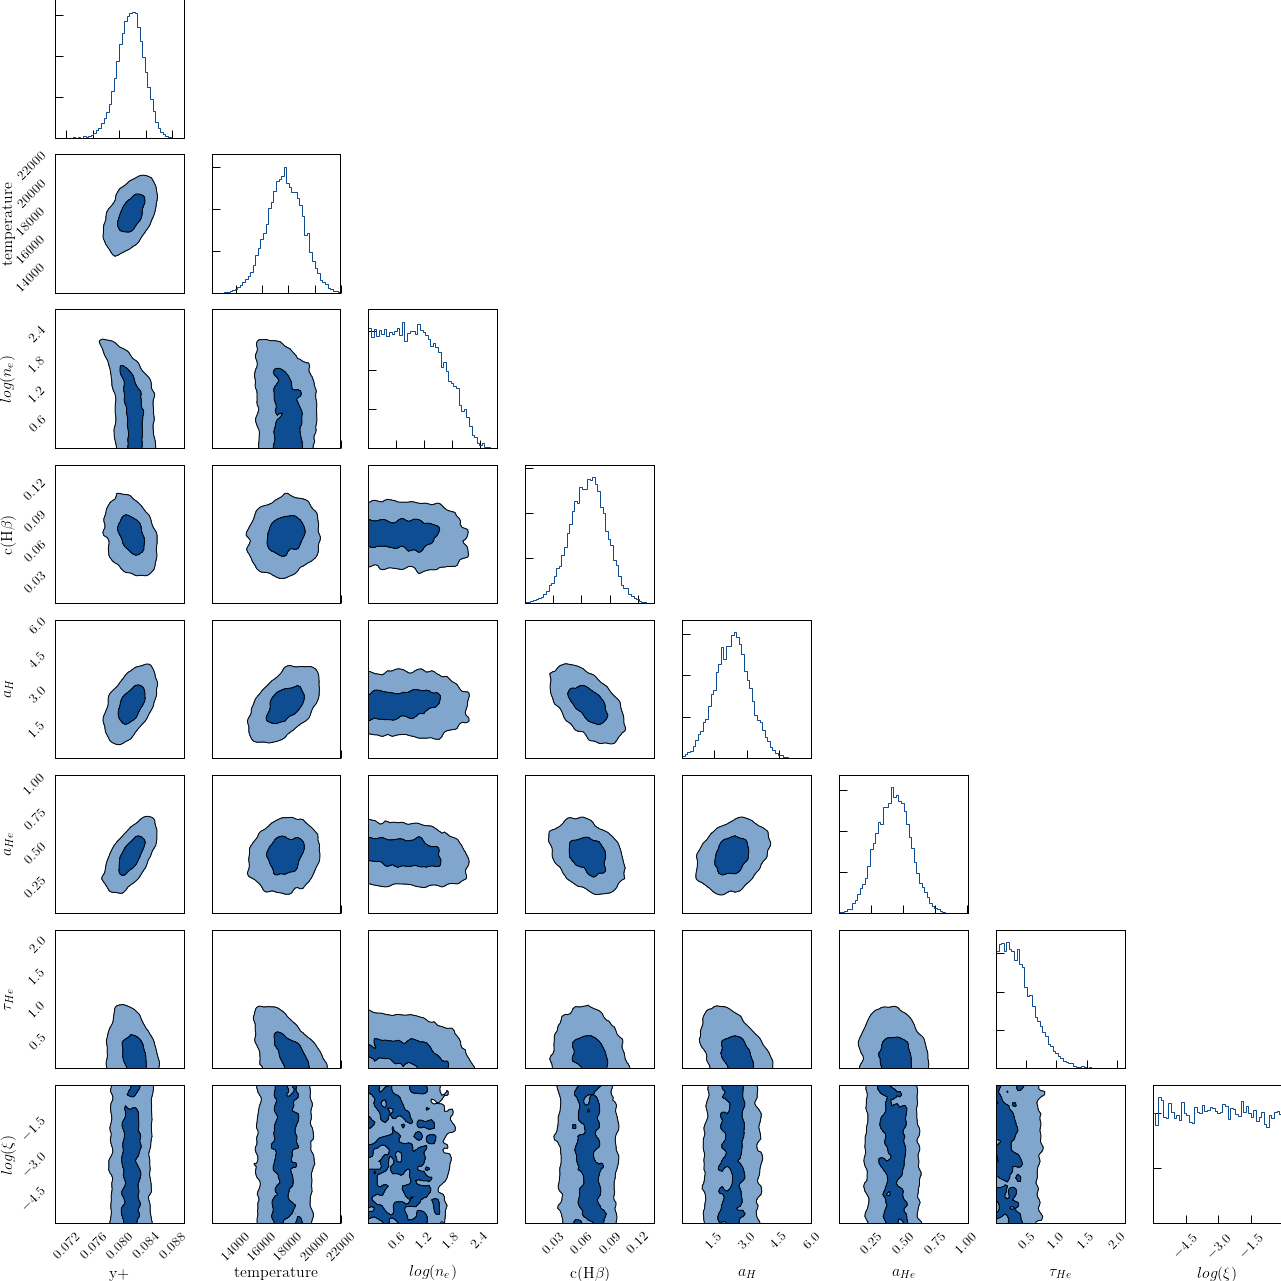

In [5]:
levels = 1.0 - np.exp(-0.5 * np.arange(1.0, 2.1, 1.0) ** 2)
contour_kwargs, contourf_kwargs = dict({}), dict({})
contour_kwargs["linewidths"] = [1.0, 1.0]
contourf_kwargs["colors"] = ((1, 1, 1), (0.502, 0.651, 0.808), (0.055, 0.302, 0.5727))
hist_kwargs = dict({})
hist_kwargs["color"] = contourf_kwargs["colors"][-1]
fig = corner.corner(opt_samples, bins=[50, 50, 50, 50, 50, 50, 50, 50], levels=levels, plot_datapoints=False, fill_contours=True, smooth=1,
plot_density=False, contour_kwargs=contour_kwargs, contourf_kwargs=contourf_kwargs, hist_kwargs=hist_kwargs, labels=prenams)#, truths=input_vals)

### Optical+NIR

In [10]:
prenams = ['y+', 'temperature', '$log(n_{e})$', 'c(H\\beta)', '$a_{H}$', '$a_{He}$', '$\\tau_{He}', '$log(\\xi)$'] #'$n_{HI}$']

print ('Best parameter values:')
y_plus_nir, temp_nir, log_dens_nir, c_Hb_nir, a_H_nir, a_He_nir, tau_He_nir, log_xi_nir = map(
    lambda v: (v[1], v[2] - v[1], v[1] - v[0]), zip(*np.percentile(nir_samples, [16, 50, 84], axis=0)))
print ('y+', y_plus_nir)
print ('T', temp_nir)
print ('log(n_e)', log_dens_nir)
print ('c(Hb)', c_Hb_nir)
print ('a_H', a_H_nir)
print ('a_He', a_He_nir)
print ('tau_He', tau_He_nir)
print ('log(xi)', log_xi_nir)

Best parameter values:
y+ (0.08013846141416171, 0.0007598341628576311, 0.0007347269492976455)
T (18050.815764424176, 393.5276284893116, 408.0754695979267)
log(n_e) (1.9960501789396168, 0.02968804105868106, 0.03126623806938045)
c(Hb) (0.10003496117335255, 0.0014611925023829825, 0.0014971764011330463)
a_H (0.9350954468825595, 0.03549241256514757, 0.03568482676084472)
a_He (1.0075832676690042, 0.06185517347619651, 0.06507363979414582)
tau_He (0.9892627570057598, 0.08070136338130351, 0.07664338259461168)
log(xi) (-3.2370732506020543, 2.1117164114035005, 1.900629279363108)


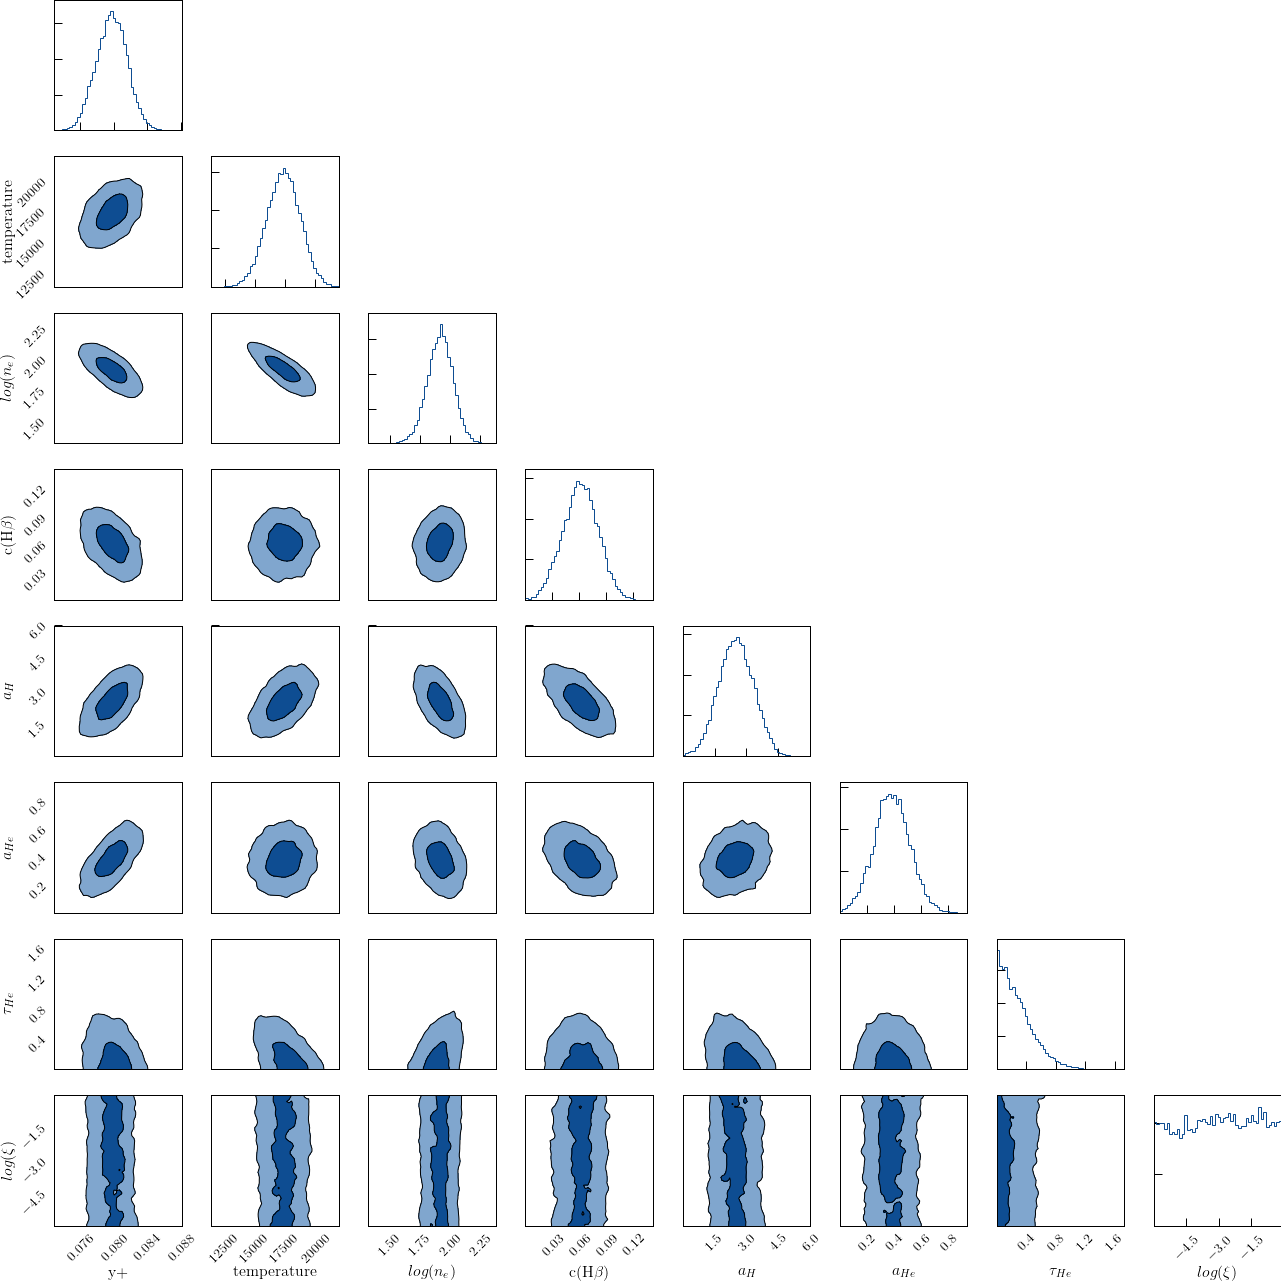

In [7]:
levels = 1.0 - np.exp(-0.5 * np.arange(1.0, 2.1, 1.0) ** 2)
contour_kwargs, contourf_kwargs = dict({}), dict({})
contour_kwargs["linewidths"] = [1.0, 1.0]
contourf_kwargs["colors"] = ((1, 1, 1), (0.502, 0.651, 0.808), (0.055, 0.302, 0.5727))
hist_kwargs = dict({})
hist_kwargs["color"] = contourf_kwargs["colors"][-1]
fig = corner.corner(nir_samples, bins=[50, 50, 50, 50, 50, 50, 50, 50], levels=levels, plot_datapoints=False, fill_contours=True, smooth=1,
plot_density=False, contour_kwargs=contour_kwargs, contourf_kwargs=contourf_kwargs, hist_kwargs=hist_kwargs, labels=prenams)#, truths=input_vals)

/Users/thsyu/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/thsyu/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/thsyu/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


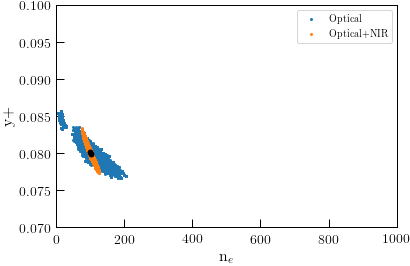

In [11]:
plt.plot(10**opt_samples[:, 2], opt_samples[:,0], '.', label='Optical')
plt.plot(10**nir_samples[:, 2], nir_samples[:,0], '.', label='Optical+NIR')
plt.errorbar(10**log_dens_opt[0], y_plus_opt[0], xerr=[[10**log_dens_opt[1],10**log_dens_opt[2]]], yerr=[[y_plus_opt[1],y_plus_opt[2]]], marker='o', color='black')
plt.errorbar(10**log_dens_nir[0], y_plus_nir[0], xerr=[[10**log_dens_nir[1],10**log_dens_nir[2]]], yerr=[[y_plus_nir[1],y_plus_nir[2]]], marker='o', color='black')
plt.xlim(0, 1000)
plt.ylim(0.07, 0.1)
plt.xlabel(r'n$_{e}$')
plt.ylabel('y+')
plt.legend()
#plt.savefig('ne_vs_y+.pdf', overwrite=True)
plt.show()

## Histogram comparison

/Users/thsyu/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
/Users/thsyu/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/thsyu/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


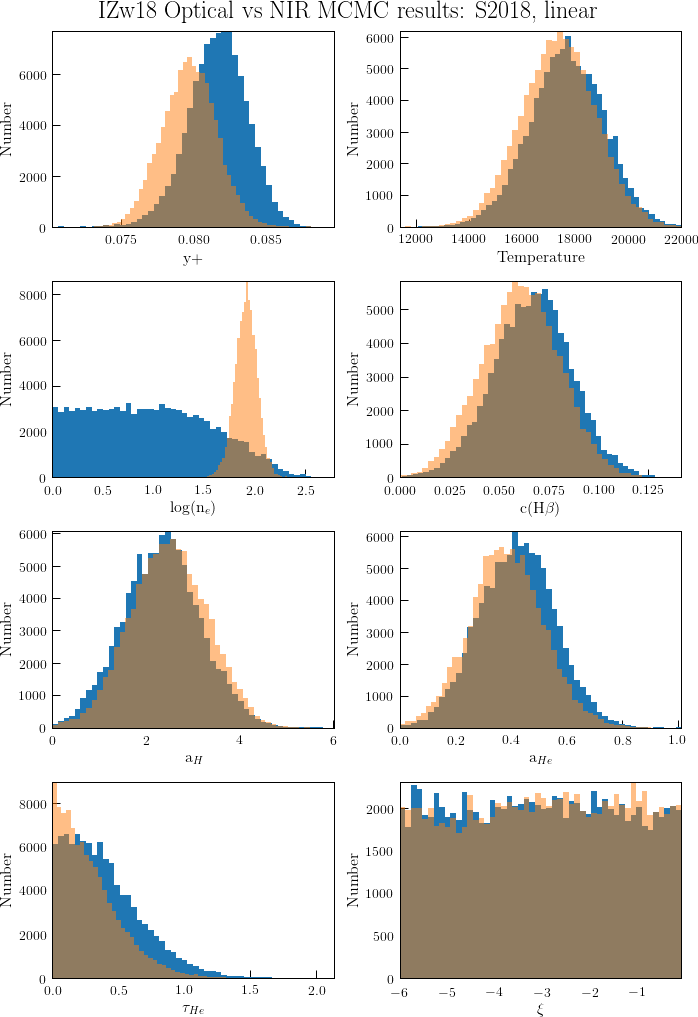

In [11]:
f, ax = plt.subplots(4,2, figsize=(10, 14))

ax[0,0].hist(opt_samples[:,0], bins=50, label='Optical')
ax[0,0].hist(nir_samples[:,0], bins=50, alpha=0.5, label='Optical+NIR')
ax[0,0].set_xlabel('y+')
ax[0,0].set_ylabel('Number')
ax[0,1].hist(opt_samples[:,1], bins=50, label='Optical')
ax[0,1].hist(nir_samples[:,1], bins=50, alpha=0.5, label='Optical+NIR')
ax[0,1].set_xlabel('Temperature')
ax[0,1].set_ylabel('Number')
ax[1,0].hist(opt_samples[:,2], bins=50, label='Optical')
ax[1,0].hist(nir_samples[:,2], bins=50, alpha=0.5, label='Optical+NIR')
ax[1,0].set_xlabel(r'log(n$_{e}$)')
ax[1,0].set_ylabel('Number')
ax[1,1].hist(opt_samples[:,3], bins=50, label='Optical')
ax[1,1].hist(nir_samples[:,3], bins=50, alpha=0.5, label='Optical+NIR')
ax[1,1].set_xlabel(r'c(H$\beta$)')
ax[1,1].set_ylabel('Number')
ax[2,0].hist(opt_samples[:,4], bins=50, label='Optical')
ax[2,0].hist(nir_samples[:,4], bins=50, alpha=0.5, label='Optical+NIR')
ax[2,0].set_xlabel(r'a$_{H}$')
ax[2,0].set_ylabel('Number')
ax[2,1].hist(opt_samples[:,5], bins=50, label='Optical')
ax[2,1].hist(nir_samples[:,5], bins=50, alpha=0.5, label='Optical+NIR')
ax[2,1].set_xlabel(r'a$_{He}$')
ax[2,1].set_ylabel('Number')
ax[3,0].hist(opt_samples[:,6], bins=50, label='Optical')
ax[3,0].hist(nir_samples[:,6], bins=50, alpha=0.5, label='Optical+NIR')
ax[3,0].set_xlabel(r'$\tau_{He}$')
ax[3,0].set_ylabel('Number')
ax[3,1].hist(opt_samples[:,7], bins=50, label='Optical')
ax[3,1].hist(nir_samples[:,7], bins=50, alpha=0.5, label='Optical+NIR')
ax[3,1].set_xlabel(r'$\xi$')
ax[3,1].set_ylabel('Number')


f.suptitle('IZw18 Optical vs NIR MCMC results: S2018, linear', y=1.02, fontsize=24)
#f.savefig('/Users/thsyu/Dropbox/BCDs/primordial_helium/optical_vs_NIR_histograms-S2018_11.pdf', overwrite=True)
f.show()




# Test mfr on emissivities

# Import and load HeI emissivity tables

In [795]:
import importlib
importlib.reload(mfr)

import scipy.interpolate as interp

In [686]:
import os

path = os.getcwd()
helium_emis = Table.read(path+'/tables/helium_emissivity', format='ascii', delimiter='\t')
helium_emis_coeff = Table.read(path+'/tables/helium_emissivity_coeff', format='ascii', delimiter='\t')

## Compare HeI emissivities

In [687]:
# Compare hydrogen emissivities
# H8
print (mfr.hydrogen_emissivity_HS1987(3890, 18000, 100))
print (mfr.hydrogen_emissivity_S2018(3890, 18000, 100))
print (mfr.hydrogen_emissivity_S2018(3890, 18000, 100, deg='cubic'))
# Pg
print (mfr.hydrogen_emissivity_S2018(10940, 18000, 100))
print (0.349*0.259) # From Osterbrock Pg/Hd * Hd/Hb

0.10685033165882382
0.10701592589023938
0.1070159258902394
0.08348497570510262
0.090391


In [689]:
# Compare helium emissivities
# HeI10830
print (mfr.helium_emissivity_PFSD2012(10830, 18000, 100))
print (mfr.helium_emissivity_old_PFSD2012(10830, 18000, 100))
print (mfr.helium_emissivity_PFSD2012(10830, 18000, 100, ratio='storey'))
print (mfr.helium_emissivity_PFSD2012(10830, 18000, 100, deg='cubic', ratio='storey'))

3.4472364768958097
3.4472364768958097
3.441520487809281
3.4415204878093095


In [690]:
# Compare HeI10830/HeI4471
print (mfr.helium_emissivity_PFSD2012(10830, 18000, 100)/mfr.helium_emissivity_PFSD2012(4472, 18000, 100))
print (4.42, 5.02) # 1e4, 2e4 emissivities from Osterbrock...ours should be some where in between..?!
print (mfr.helium_emissivity_PFM2007(10830, 18000)/(mfr.helium_emissivity_PFM2007(4472, 18000)*(1+mfr.helium_collision_to_recomb(4472, 18000, 100))))

7.352414789995087
4.42 5.02
4.857372918869968


In [691]:
print (mfr.helium_emissivity_PFSD2012(10830, 18000, 100))
print (mfr.helium_emissivity_PFM2007(10830, 18000))

3.4472364768958097
2.2636225752531987


In [692]:
print (mfr.helium_emissivity_PFSD2012(4472, 18000, 100))
print (mfr.helium_emissivity_PFM2007(4472, 18000)*(1+mfr.helium_collision_to_recomb(4472, 18000, 100)))

0.46885772570757167
0.46601786872477013


Looks like PFSD2012 HeI10830 emissivity is larger than expected..although, PFM2007 emissivities do not include C/R

In [693]:
a = mfr.helium_emissivity_PFSD2012(10830, 18000, 100)/mfr.helium_emissivity_PFSD2012(4472, 18000, 100)
b = mfr.helium_emissivity_PFM2007(4472, 18000)*(1+mfr.helium_collision_to_recomb(4472, 18000, 100))
c = mfr.helium_emissivity_PFM2007(10830, 18000)

print ( ( a*b/c ) - 1 )

# C/R at HeI10830 needs to be 0.51 in order for PFM2007 and PFSD2012 HeI10830 emissivities to match
# (assuming I have calculated the PFM and PFSD emissivities correctly)

0.5136607612383135


## PFM2007 HeI10830 emissivity

In [694]:
a = -3.9020e5
b = -1.7846e3
c = 4.9448e4
d = 1.0443e6
T1 = 10000
T2 = 20000

print ( (a + (b * np.log(T1)**2.) + (c * np.log(T1)) + (d/np.log(T1)))*(1/T1) ) #HeI10830 at 10,000K
print ( (a + (b * np.log(T2)**2.) + (c * np.log(T2)) + (d/np.log(T2)))*(1/T2) ) #HeI10830 at 20,000K
print ( (-2.6584e5 - (1420.9 * np.log(T1)**2) + (35546 * np.log(T1)) + (6.5669e5/np.log(T1)))*(1/T1) ) #Hb at 10,000K
print ( (-2.6584e5 - (1420.9 * np.log(T2)**2) + (35546 * np.log(T2)) + (6.5669e5/np.log(T2)))*(1/T2) ) #Hb at 20,000K

2.7228064689013802
1.496172670983019
1.2314497289666935
0.6568894062777909


In [695]:
print (2.7228064689013802/1.2314497289666935)
print (mfr.helium_emissivity_PFM2007(10830, 10000))

print (1.496172670983019/0.6568894062777909)
print (mfr.helium_emissivity_PFM2007(10830, 20000))

# Confirmed that method helium_emissivity_PFM2007() is correct compared to a manual calculation

2.2110577515706473
2.2110577515706473
2.2776629622647695
2.2776629622647695


## PFSD2012 HeI10830 emissivity

Just looking at the table, the values at T = 10,000K and 20,000K at density = 100 are 

In [726]:
test_dens = np.linspace(0, 1000)

#print(test_dens)

[   0.           20.40816327   40.81632653   61.2244898    81.63265306
  102.04081633  122.44897959  142.85714286  163.26530612  183.67346939
  204.08163265  224.48979592  244.89795918  265.30612245  285.71428571
  306.12244898  326.53061224  346.93877551  367.34693878  387.75510204
  408.16326531  428.57142857  448.97959184  469.3877551   489.79591837
  510.20408163  530.6122449   551.02040816  571.42857143  591.83673469
  612.24489796  632.65306122  653.06122449  673.46938776  693.87755102
  714.28571429  734.69387755  755.10204082  775.51020408  795.91836735
  816.32653061  836.73469388  857.14285714  877.55102041  897.95918367
  918.36734694  938.7755102   959.18367347  979.59183673 1000.        ]


In [729]:
he10830 = np.zeros(test_dens.size)
he10830_old = np.zeros(test_dens.size)
he7065 = np.zeros(test_dens.size)
he6678 = np.zeros(test_dens.size)
he5876 = np.zeros(test_dens.size)
he4471 = np.zeros(test_dens.size)
he4026 = np.zeros(test_dens.size)
he3889 = np.zeros(test_dens.size)
he10830_cubic = np.zeros(test_dens.size)
he7065_cubic = np.zeros(test_dens.size)
he6678_cubic = np.zeros(test_dens.size)
he5876_cubic = np.zeros(test_dens.size)
he4471_cubic = np.zeros(test_dens.size)
he4026_cubic = np.zeros(test_dens.size)
he3889_cubic = np.zeros(test_dens.size)

for d in range(test_dens.size):
    he10830[d] = mfr.helium_emissivity_PFSD2012(10830, 18000, test_dens[d])
    he10830_old[d] = mfr.helium_emissivity_old_PFSD2012(10830, 18000, test_dens[d])
    he7065[d] = mfr.helium_emissivity_PFSD2012(7065, 18000, test_dens[d])
    he6678[d] = mfr.helium_emissivity_PFSD2012(6678, 18000, test_dens[d])
    he5876[d] = mfr.helium_emissivity_PFSD2012(5876, 18000, test_dens[d])
    he4471[d] = mfr.helium_emissivity_PFSD2012(4471, 18000, test_dens[d])
    he4026[d] = mfr.helium_emissivity_PFSD2012(4026, 18000, test_dens[d])
    he3889[d] = mfr.helium_emissivity_PFSD2012(3889, 18000, test_dens[d])
    he10830_cubic[d] = mfr.helium_emissivity_PFSD2012(10830, 18000, test_dens[d], deg='cubic')
    he7065_cubic[d] = mfr.helium_emissivity_PFSD2012(7065, 18000, test_dens[d], deg='cubic')
    he6678_cubic[d] = mfr.helium_emissivity_PFSD2012(6678, 18000, test_dens[d], deg='cubic')
    he5876_cubic[d] = mfr.helium_emissivity_PFSD2012(5876, 18000, test_dens[d], deg='cubic')
    he4471_cubic[d] = mfr.helium_emissivity_PFSD2012(4471, 18000, test_dens[d], deg='cubic')
    he4026_cubic[d] = mfr.helium_emissivity_PFSD2012(4026, 18000, test_dens[d], deg='cubic')
    he3889_cubic[d] = mfr.helium_emissivity_PFSD2012(3889, 18000, test_dens[d], deg='cubic')

/Users/thsyu/Software/Yp/model_flux_ratio.py:337: RuntimeWarning: divide by zero encountered in log10
  elif HeI_line == '5016':


In [700]:
hb18000 =( (-2.6584e5 - (1420.9 * np.log(18000)**2) + (35546 * np.log(18000)) + (6.5669e5/np.log(18000)))*(1/18000) ) #Hb at 10,000K
print (hb18000) #Hb emissivity at 18000K

0.7252853803171602


In [ ]:
finemesh_dens = np.array(np.unique(helium_finemesh_emis['log n_e']))
print (finemesh_dens)
finemesh_temp = np.arange(10000, 22250, step=250)
print (finemesh_temp[32])

/Users/thsyu/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
/Users/thsyu/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


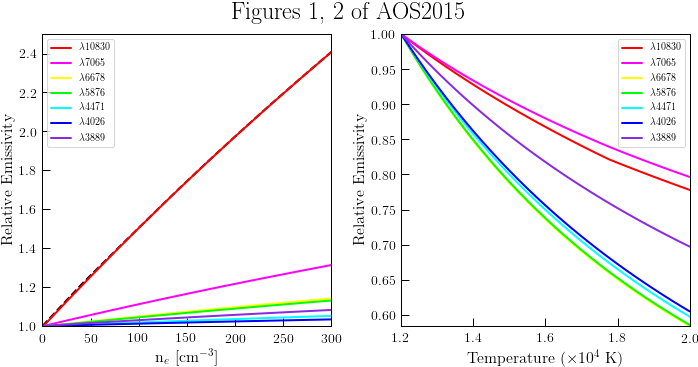

In [843]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5))

ax1.plot(test_dens, he10830/he10830[0], color='black', ls='--')
ax1.plot(10**finemesh_dens[0:26], 10**helium_finemesh_emis['10830A'].reshape((31, 49))[0:26,32]/10**helium_finemesh_emis['10830A'].reshape((31, 49))[0,32], color='red', label=r'$\lambda$10830') # 18000K
ax1.plot(10**finemesh_dens[0:26], 10**helium_finemesh_emis['7065A'].reshape((31, 49))[0:26,32]/10**helium_finemesh_emis['7065A'].reshape((31, 49))[0,32], color='magenta', label=r'$\lambda$7065')
ax1.plot(10**finemesh_dens[0:26], 10**helium_finemesh_emis['6678A'].reshape((31, 49))[0:26,32]/10**helium_finemesh_emis['6678A'].reshape((31, 49))[0,32], color='yellow', label=r'$\lambda$6678') # 18000K
ax1.plot(10**finemesh_dens[0:26], 10**helium_finemesh_emis['5876A'].reshape((31, 49))[0:26,32]/10**helium_finemesh_emis['5876A'].reshape((31, 49))[0,32], color='lime', label=r'$\lambda$5876')
ax1.plot(10**finemesh_dens[0:26], 10**helium_finemesh_emis['4471A'].reshape((31, 49))[0:26,32]/10**helium_finemesh_emis['4471A'].reshape((31, 49))[0,32], color='cyan', label=r'$\lambda$4471') # 18000K
ax1.plot(10**finemesh_dens[0:26], 10**helium_finemesh_emis['4026A'].reshape((31, 49))[0:26,32]/10**helium_finemesh_emis['4026A'].reshape((31, 49))[0,32], color='blue', label=r'$\lambda$4026')
ax1.plot(10**finemesh_dens[0:26], 10**helium_finemesh_emis['3889A'].reshape((31, 49))[0:26,32]/10**helium_finemesh_emis['3889A'].reshape((31, 49))[0,32], color='blueviolet', label=r'$\lambda$3889') # 18000K
ax1.set_xlim(0, 300)
ax1.set_ylim(1.0, 2.5)
ax1.set_xlabel(r'n$_{e}~$[cm$^{-3}$]')
ax1.set_ylabel('Relative Emissivity')
ax1.legend()

ax2.plot(finemesh_temp[8:41]/1e4, 10**helium_finemesh_emis['10830A'].reshape((31, 49))[6,8:41]/10**helium_finemesh_emis['10830A'].reshape((31, 49))[6,8], color='red', label=r'$\lambda$10830') # 18000K
ax2.plot(finemesh_temp[8:41]/1e4, 10**helium_finemesh_emis['7065A'].reshape((31, 49))[6,8:41]/10**helium_finemesh_emis['7065A'].reshape((31, 49))[6,8], color='magenta', label=r'$\lambda$7065')
ax2.plot(finemesh_temp[8:41]/1e4, 10**helium_finemesh_emis['6678A'].reshape((31, 49))[6,8:41]/10**helium_finemesh_emis['6678A'].reshape((31, 49))[6,8], color='yellow', label=r'$\lambda$6678') # 18000K
ax2.plot(finemesh_temp[8:41]/1e4, 10**helium_finemesh_emis['5876A'].reshape((31, 49))[6,8:41]/10**helium_finemesh_emis['5876A'].reshape((31, 49))[6,8], color='lime', label=r'$\lambda$5876')
ax2.plot(finemesh_temp[8:41]/1e4, 10**helium_finemesh_emis['4471A'].reshape((31, 49))[6,8:41]/10**helium_finemesh_emis['4471A'].reshape((31, 49))[6,8], color='cyan', label=r'$\lambda$4471') # 18000K
ax2.plot(finemesh_temp[8:41]/1e4, 10**helium_finemesh_emis['4026A'].reshape((31, 49))[6,8:41]/10**helium_finemesh_emis['4026A'].reshape((31, 49))[6,8], color='blue', label=r'$\lambda$4026')
ax2.plot(finemesh_temp[8:41]/1e4, 10**helium_finemesh_emis['3889A'].reshape((31, 49))[6,8:41]/10**helium_finemesh_emis['3889A'].reshape((31, 49))[6,8], color='blueviolet', label=r'$\lambda$3889') # 18000K
ax2.set_xlabel(r'Temperature ($\times 10^{4}$~K)')
ax2.set_ylabel('Relative Emissivity')
ax2.legend()

f.suptitle('Figures 1, 2 of AOS2015', y=1.05, fontsize=24)
#f.savefig('/Users/thsyu/Dropbox/BCDs/primordial_helium/fig_1&2_aos2015.pdf', overwrite=True)
f.show()





# Test hydrogen emissivities

In [567]:
from functools import reduce

In [568]:
hydrogen_emis = Table.read(path+'/tables/hydrogen_emissivity_S2018', format='ascii', delimiter='\t')

In [569]:
ha_RBS = np.zeros((21,6))
hb_RBS = np.zeros((21,6))
hg_RBS = np.zeros((21,6))
hd_RBS = np.zeros((21,6))
h8_RBS = np.zeros((21,6))
pg_RBS = np.zeros((21,6))

for t in range(len(np.arange(5000, 26000, 1000))):
    ha_RBS[t] = hydrogen_emis['emissivity'][reduce(np.intersect1d, (np.where(hydrogen_emis['Nu'] == 3)[0], \
                                                          np.where(hydrogen_emis['Nl'] == 2)[0], \
                                                          np.where(hydrogen_emis['T'] == np.arange(5000, 26000, 1000)[t])))]
    hb_RBS[t] = hydrogen_emis['emissivity'][reduce(np.intersect1d, (np.where(hydrogen_emis['Nu'] == 4)[0], \
                                                          np.where(hydrogen_emis['Nl'] == 2)[0], \
                                                          np.where(hydrogen_emis['T'] == np.arange(5000, 26000, 1000)[t])))]
    hg_RBS[t] = hydrogen_emis['emissivity'][reduce(np.intersect1d, (np.where(hydrogen_emis['Nu'] == 5)[0], \
                                                          np.where(hydrogen_emis['Nl'] == 2)[0], \
                                                          np.where(hydrogen_emis['T'] == np.arange(5000, 26000, 1000)[t])))]
    hd_RBS[t] = hydrogen_emis['emissivity'][reduce(np.intersect1d, (np.where(hydrogen_emis['Nu'] == 6)[0], \
                                                          np.where(hydrogen_emis['Nl'] == 2)[0], \
                                                          np.where(hydrogen_emis['T'] == np.arange(5000, 26000, 1000)[t])))]
    h8_RBS[t] = hydrogen_emis['emissivity'][reduce(np.intersect1d, (np.where(hydrogen_emis['Nu'] == 8)[0], \
                                                          np.where(hydrogen_emis['Nl'] == 2)[0], \
                                                          np.where(hydrogen_emis['T'] == np.arange(5000, 26000, 1000)[t])))]
    pg_RBS[t] = hydrogen_emis['emissivity'][reduce(np.intersect1d, (np.where(hydrogen_emis['Nu'] == 6)[0], \
                                                          np.where(hydrogen_emis['Nl'] == 3)[0], \
                                                          np.where(hydrogen_emis['T'] == np.arange(5000, 26000, 1000)[t])))]

# Parse new HeI emissivities

In [708]:
helium_finemesh_emis = Table.read('/Users/thsyu/Software/Yp/tables/helium_emissivity_finemesh', format='ascii', delimiter='\t')

In [709]:
helium_finemesh_emis

Temp,log n_e,2945A,3188A,3614A,3889A,3965A,4026A,4121A,4388A,4438A,4471A,4713A,4922A,5016A,5048A,5876A,6678A,7065A,7281A,9464A,10830A,11013A,11969A,12527A,12756A,12785A,12790A,12846A,12968A,12985A,13412A,15084A,17003A,18556A,18685A,18697A,19089A,19543A,20427A,20581A,20602A,21118A,21130A,21608A,21617A
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
10000,0.0,-25.57038,-25.25312,-26.15944,-24.85778,-25.85078,-25.5371,-26.60914,-26.11324,-26.99094,-25.21439,-26.19652,-25.78279,-25.4516,-26.61176,-24.7728,-25.31882,-25.54299,-26.05472,-26.82769,-24.56044,-27.25731,-26.5334,-26.74763,-28.18147,-26.0265,-26.50383,-27.31513,-27.01103,-27.28394,-27.67239,-27.1252,-26.36488,-27.89123,-25.65335,-26.13088,-26.81725,-26.98188,-27.90847,-25.39267,-27.62531,-27.01281,-27.40219,-27.09242,-27.56928
10250,0.0,-25.57747,-25.26032,-26.16736,-24.86538,-25.85877,-25.54717,-26.61372,-26.12347,-26.99657,-25.22494,-26.20155,-25.79352,-25.45992,-26.61761,-24.78461,-25.33078,-25.549,-26.06111,-26.83478,-24.56945,-27.26523,-26.54347,-26.75483,-28.18939,-26.03917,-26.51649,-27.31971,-27.02126,-27.29104,-27.67802,-27.13319,-26.37543,-27.89922,-25.6669,-26.14442,-26.82798,-26.98908,-27.91556,-25.40229,-27.6351,-27.01785,-27.40804,-27.1044,-27.58126
10500,0.0,-25.58442,-25.26737,-26.17512,-24.87283,-25.8666,-25.55704,-26.61819,-26.1335,-27.00206,-25.23528,-26.20645,-25.80402,-25.46808,-26.62332,-24.79615,-25.34248,-25.55488,-26.06734,-26.84173,-24.57826,-27.27299,-26.55335,-26.76188,-28.19715,-26.05156,-26.52889,-27.32419,-27.03129,-27.29799,-27.6835,-27.14102,-26.38577,-27.90704,-25.68015,-26.15766,-26.83849,-26.99614,-27.9225,-25.41171,-27.64469,-27.02275,-27.41376,-27.11614,-27.59299
10750,0.0,-25.59123,-25.27429,-26.18273,-24.88012,-25.87427,-25.56673,-26.62255,-26.14334,-27.00743,-25.24541,-26.21124,-25.81432,-25.47606,-26.62891,-24.80746,-25.35394,-25.56061,-26.07344,-26.84854,-24.58688,-27.28061,-26.56304,-26.7688,-28.20476,-26.06371,-26.54103,-27.32855,-27.04113,-27.3048,-27.68888,-27.14869,-26.3959,-27.91471,-25.69312,-26.17062,-26.84879,-27.00305,-27.9293,-25.42092,-27.6541,-27.02754,-27.41935,-27.12764,-27.60449
11000,0.0,-25.59791,-25.28106,-26.19019,-24.88726,-25.88179,-25.57622,-26.62681,-26.15298,-27.01267,-25.25534,-26.21591,-25.82442,-25.48389,-26.63438,-24.81853,-25.36516,-25.56622,-26.07941,-26.85522,-24.59531,-27.28807,-26.57253,-26.77557,-28.21223,-26.07561,-26.55293,-27.33281,-27.05077,-27.31147,-27.69412,-27.15621,-26.40583,-27.92224,-25.70581,-26.18331,-26.85889,-27.00982,-27.93597,-25.42993,-27.66333,-27.03221,-27.42481,-27.13892,-27.61577
11250,0.0,-25.60445,-25.2877,-26.19752,-24.89425,-25.88918,-25.58554,-26.63098,-26.16246,-27.01781,-25.26509,-26.22048,-25.83433,-25.49157,-26.63972,-24.82939,-25.37615,-25.5717,-26.08524,-26.86176,-24.60356,-27.29539,-26.58185,-26.78221,-28.21955,-26.08728,-26.56459,-27.33697,-27.06025,-27.31802,-27.69926,-27.1636,-26.41558,-27.92962,-25.71825,-26.19574,-26.8688,-27.01646,-27.94251,-25.43877,-27.67239,-27.03678,-27.43015,-27.14999,-27.62684
11500,0.0,-25.61088,-25.29422,-26.20471,-24.90112,-25.89642,-25.59469,-26.63504,-26.17175,-27.02284,-25.27465,-26.22495,-25.84405,-25.4991,-26.64496,-24.84002,-25.38693,-25.57706,-26.09096,-26.86819,-24.61165,-27.30258,-26.59099,-26.78872,-28.22674,-26.09871,-26.57603,-27.34104,-27.06954,-27.32444,-27.70429,-27.17085,-26.42513,-27.93687,-25.73043,-26.20791,-26.87852,-27.02298,-27.94893,-25.44742,-27.68129,-27.04125,-27.43539,-27.16085,-27.6377
11750,0.0,-25.61719,-25.30061,-26.21177,-24.90785,-25.90354,-25.60368,-26.63902,-26.18089,-27.02776,-25.28403,-26.22932,-25.8536,-25.5065,-26.65008,-24.85045,-25.3975,-25.58231,-26.09656,-26.8745,-24.61956,-2

In [710]:
finemesh_dens = np.array(np.unique(helium_finemesh_emis['log n_e']))
print (finemesh_dens)
finemesh_temp = np.arange(10000, 22250, step=250)
print (finemesh_temp[32])

[0.     0.699  1.     1.3979 1.699  1.8751 2.     2.0969 2.1761 2.243
 2.301  2.3674 2.4249 2.4771 2.5441 2.6021 2.6532 2.699  2.7404 2.7782
 2.8129 2.8451 2.8751 2.9031 2.9542 3.     3.0792 3.1761 3.301  3.699
 4.    ]
18000


In [711]:
# New, finemesh HeI
HeI10830_finemesh = interp.RectBivariateSpline(finemesh_dens, finemesh_temp, helium_finemesh_emis['10830A'].reshape((31,49)), kx=1, ky=1)
# Older, PFSD HeI
HeI_emis_10833_lin = interp.RectBivariateSpline(np.logspace(1, 14, num=14), np.linspace(5e3, 25e3, num=21), helium_emis['10830A'].reshape((14, 21)), kx=1, ky=1)

In [672]:
print (he_new['10830A'].reshape((31,49))[0][32]) # log(n_e) = 0; T=18000
print (HeI10830_finemesh(0.5, 18000)[0][0]) # log(n_e) = 0.5; T=18000 INTERPOLATED! -- looks good
print (he_new['10830A'].reshape((31,49))[1][32]) # log(n_e) = 1; T=18000

-24.77894
-24.772473619456363
-24.7699


In [657]:
HeI_emis_10833_lin = interp.RectBivariateSpline(np.logspace(1, 14, num=14), np.linspace(5e3, 25e3, num=21), helium_emis['10830A'].reshape((14, 21)), kx=1, ky=1)


In [659]:
# For old emissivities, I was feeding in 1, 10, 100, 1000, 10000, etc. for interpolation, which is why 
# I should feed it in densities not in logspace should I change this to log(n_e)??
np.linspace(1,14,num=14)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14.])